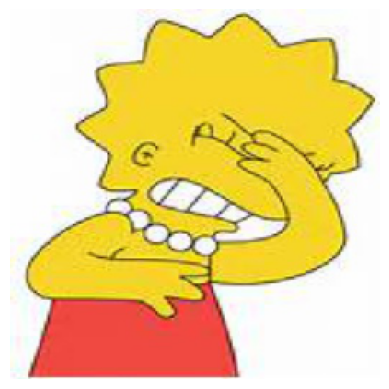

In [49]:
#load the data
# Setting Training & Test dir paths
from keras.utils import load_img,img_to_array
from matplotlib import pyplot as plt
root_path = './dataset-Simpsons_Main_Characters/'
train_path = root_path + 'train_images/'
test_path = root_path + 'test_images/'

# Displaying the image
img = load_img(train_path + "lisa_simpson/pic_0081.jpg", target_size=(224,224))
plt.imshow(img)
plt.axis("off")
plt.show()

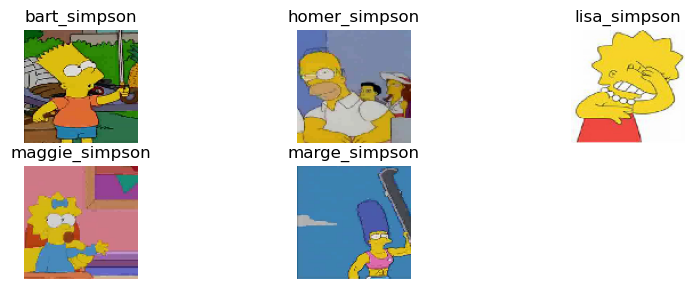

In [50]:
# Visualizing more Images
images = ['bart_simpson', 'homer_simpson', 'lisa_simpson', 'maggie_simpson', 'marge_simpson']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path + images[i] +"/pic_0081.jpg", target_size=(100,100)))

In [ ]:
# There are too few maggie_simpson pictures, data enhancement, expand the number of samples
from keras.preprocessing.image import ImageDataGenerator
path = "maggie_simpson_sample"
dst_path = "gen_maggie_simpson"

datagen = ImageDataGenerator(rotation_range=10,width_shift_range=0.1,
                             height_shift_range=0.02,horizontal_flip=True,
                             vertical_flip=True)
gen = datagen.flow_from_directory(path,target_size=(224,224),
                                  batch_size=2,save_to_dir=dst_path,
                                  save_prefix="gen",save_format="jpg")
#224,224 VGG input size
for i in range(500):
    gen.next()

In [32]:
import os
# Look into the data directory and designate classes.
print(os.listdir(root_path))
classes = os.listdir(root_path + '/train_images')
print(classes)

['test_images', 'train_images']
['maggie_simpson', 'marge_simpson', 'bart_simpson', 'lisa_simpson', 'homer_simpson']


In [37]:

# Printing the shape of the image array 
img = img_to_array(img)
print(type(img), img.shape)

<class 'numpy.ndarray'> (224, 224, 3)


In [38]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
import numpy as np
model_vgg = VGG16(weights="imagenet",include_top=False)
X = np.expand_dims(img,axis=0)#add a dimension
X = preprocess_input(X)
print(X.shape)

(1, 224, 224, 3)


In [39]:
#feature extraction
features = model_vgg.predict(X)
print(features.shape)

1/1 [==============================] - 0s 279ms/step
(1, 7, 7, 512)


In [40]:
features = features.reshape(1,7*7*512)
print(features.shape)

(1, 25088)


In [45]:
img_path = []
images = list(train_dir.glob('*/*.jpg'))
for i in images:
    img_path.append(i)
print(img_path)

[PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_18_3132611.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_46_1805125.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_36_5587272.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_26_4084259.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_25_4695342.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_44_6887017.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_2_6467394.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_12_2203739.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_11_2848199.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_22_7322135.jpg'), PosixPath('dataset-Simpsons_Main_Characters/train_images/mag

In [46]:
#feature extraction method
def modelProcess(img_path,model):
    img = load_img(img_path,target_size=(224,224))
    img = img_to_array(img)
    X = np.expand_dims(img,axis=0)#
    X = preprocess_input(X)
    X_VGG = model.predict(X)
    X_VGG = X_VGG.reshape(1,7*7*512)
    return X_VGG

In [47]:
#image batch processing
features_train = np.zeros([len(img_path),7*7*512])
for i in range(len(img_path)):
    features_i = modelProcess(img_path[i],model_vgg)
    print("preprocessed:",img_path[i])
    features_train[i] = features_i
print("Done")

1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_18_3132611.jpg
1/1 [==============================] - 0s 139ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_46_1805125.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_36_5587272.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_26_4084259.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_25_4695342.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_44_6887017.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggi

1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_27_1212778.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_24_8070617.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_46_7570531.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_32_1951536.jpg
1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_34_1294390.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_28_9387295.jpg
1/1 [==============================] - 0s 138ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggi

1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_19_5486316.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_35_7059132.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_40_5047160.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_36_3150647.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_42_1859182.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_35_5871646.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_s

1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_40_3464835.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_32_999950.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_11_4838536.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_12_180733.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_26_6379274.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_2_4304564.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_si

1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_32_4822667.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_38_6747204.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_22_7294254.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_37_9888924.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_6_783142.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_20_3521558.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_

1/1 [==============================] - 0s 129ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/pic_0102.jpg
1/1 [==============================] - 0s 138ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_22_1626102.jpg
1/1 [==============================] - 0s 136ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_18_7814313.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/pic_0116.jpg
1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_19_109967.jpg
1/1 [==============================] - 0s 132ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_38_9498388.jpg
1/1 [==============================] - 0s 128ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_25_5164333.jpg
1/1 [==============================] - 0s 165ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/pic_0111.jpg
1/1 [==============================] - 0s 149ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_16_1119697.jpg
1/1 [==============================] - 0s 140ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_18_15847.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_14_6086723.jpg
1/1 [==============================] - 0s 134ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_42_8987966.jpg
1/1 [==============================] - 0s 128ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpso

1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_21_7219623.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/pic_0095.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_13_8792471.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_31_8098498.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_4_7649284.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_31_6181459.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpso

1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_36_24220.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_16_4174928.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_16_8841419.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_13_5264105.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_39_3974999.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_29_4519594.jpg
1/1 [==============================] - 0s 137ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_

1/1 [==============================] - 0s 132ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_30_461103.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_5_3669392.jpg
1/1 [==============================] - 0s 146ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_12_2513118.jpg
1/1 [==============================] - 0s 138ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_42_9659075.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_29_7304814.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_30_8173490.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_

1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_16_6527021.jpg
1/1 [==============================] - 0s 133ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_0_9811581.jpg
1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_5_5543367.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_31_6400258.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_36_4573372.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_1_6189822.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_s

1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_35_4767091.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_12_552841.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_32_5931266.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_4_3525842.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_8_895919.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_39_2684243.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_si

1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_40_4454593.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_5_5769124.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_27_8118071.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_26_6309002.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_41_250436.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_14_9582029.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_

1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_35_9887023.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_30_140211.jpg
1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_1_5417823.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_3_3453276.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_25_3253978.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_40_2058214.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_s

1/1 [==============================] - 0s 138ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_34_530025.jpg
1/1 [==============================] - 0s 136ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_21_7262792.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_17_6029093.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_7_1499387.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_31_4198064.jpg
1/1 [==============================] - 0s 128ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_simpson/gen_21_6460746.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/maggie_

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1280.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0820.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0834.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0161.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0607.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0613.jpg
1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0175.jpg
1/1 [================

1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1080.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1094.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0639.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1241.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1255.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0605.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0163.jpg
1/1 [================

1/1 [==============================] - 0s 144ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0204.jpg
1/1 [==============================] - 0s 148ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0562.jpg
1/1 [==============================] - 0s 150ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1132.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0238.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1126.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0589.jpg
1/1 [==============================] - 0s 170ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0402.jpg
1/1 [===============

1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0991.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0749.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0761.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0775.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0763.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0777.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0987.jpg
1/1 [===============

1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1050.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0366.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1078.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0400.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0414.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0372.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1130.jpg
1/1 [===============

1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0664.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0102.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1208.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0116.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0670.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0658.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0880.jpg
1/1 [===============

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0896.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0128.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1236.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0100.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0666.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0672.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0114.jpg
1/1 [===============

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0529.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1145.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1192.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1186.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0298.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1019.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0307.jpg
1/1 [===============

1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0931.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0919.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0702.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0716.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0700.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0714.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0728.jpg
1/1 [===============

1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1190.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1184.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1153.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1147.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0259.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0517.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0271.jpg
1/1 [===============

1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0123.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1229.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0137.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0651.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0889.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0679.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1201.jpg
1/1 [===============

1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0492.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1203.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0109.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1217.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0121.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0647.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0653.jpg
1/1 [===============

1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0252.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0534.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0520.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0246.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1158.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1170.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0508.jpg
1/1 [===============

1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0521.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1159.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0247.jpg
1/1 [==============================] - 0s 156ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0253.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0535.jpg
1/1 [==============================] - 0s 168ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0904.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0910.jpg
1/1 [===============

1/1 [==============================] - 0s 132ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0126.jpg
1/1 [==============================] - 0s 138ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0640.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0898.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0654.jpg
1/1 [==============================] - 0s 175ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0132.jpg
1/1 [==============================] - 0s 133ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0481.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0495.jpg
1/1 [===============

1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1277.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1263.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0633.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0155.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0141.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0627.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0814.jpg
1/1 [====================

1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0787.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0208.jpg
1/1 [==============================] - 0s 136ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1116.jpg
1/1 [==============================] - 0s 174ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1102.jpg
1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0234.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0552.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0546.jpg
1/1 [===============

1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0553.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1103.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1117.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0209.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0786.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0792.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0962.jpg
1/1 [=================

1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0152.jpg
1/1 [==============================] - 0s 90ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1258.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0146.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0620.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0393.jpg
1/1 [==============================] - 0s 91ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1099.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0387.jpg
1/1 [======================

1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0636.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0622.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0144.jpg
1/1 [==============================] - 0s 91ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1272.jpg
1/1 [==============================] - 0s 91ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0178.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_1266.jpg
1/1 [==============================] - 0s 89ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/marge_simpson/pic_0193.jpg
1/1 [=====================

1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0969.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1120.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0558.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1134.jpg
1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0202.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0564.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0570.jpg
1/1 [======================

1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0565.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1135.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1121.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0559.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0968.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0954.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0798.jpg
1/1 [=======================

1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1268.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0176.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0610.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0604.jpg
1/1 [==============================] - 0s 145ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0162.jpg
1/1 [==============================] - 0s 149ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1254.jpg
1/1 [==============================] - 0s 129ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0638.jpg
1/1 [======================

1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1052.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1085.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1091.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0166.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1278.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0600.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0614.jpg
1/1 [=======================

1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0414.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0372.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1130.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0548.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1124.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0212.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0574.jpg
1/1 [=========================

1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0896.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0128.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1236.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0100.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0666.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0672.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0114.jpg
1/1 [========================

1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0529.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1145.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1192.jpg
1/1 [==============================] - 0s 173ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1186.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0298.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1019.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0307.jpg
1/1 [======================

1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0931.jpg
1/1 [==============================] - 0s 167ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0919.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0702.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0716.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0700.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0714.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0728.jpg
1/1 [======================

1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0123.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1229.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0137.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0651.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0889.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0679.jpg
1/1 [==============================] - 0s 129ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1201.jpg
1/1 [======================

1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0492.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1203.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0109.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1217.jpg
1/1 [==============================] - 0s 153ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0121.jpg
1/1 [==============================] - 0s 143ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0647.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0653.jpg
1/1 [======================

1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0252.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0534.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0520.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0246.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1158.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1170.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0508.jpg
1/1 [======================

1/1 [==============================] - 0s 158ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0126.jpg
1/1 [==============================] - 0s 182ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0640.jpg
1/1 [==============================] - 0s 135ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0898.jpg
1/1 [==============================] - 0s 140ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0654.jpg
1/1 [==============================] - 0s 136ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0132.jpg
1/1 [==============================] - 0s 151ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0481.jpg
1/1 [==============================] - 0s 135ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0495.jpg
1/1 [======================

1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0750.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0988.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1328.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0744.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0977.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0963.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0793.jpg
1/1 [==========================

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1271.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0184.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0190.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0806.jpg
1/1 [==============================] - 0s 153ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0812.jpg
1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0813.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0807.jpg
1/1 [======================

1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0555.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0541.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_1139.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0227.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0970.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0964.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/bart_simpson/pic_0794.jpg
1/1 [========================

1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0413.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0375.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1080.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1094.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0639.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1241.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1255.jpg
1/1 [======================

1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1318.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1330.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0748.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0990.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0984.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1324.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0953.jpg
1/1 [======================

1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0365.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0588.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1127.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0239.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1133.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0205.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0563.jpg
1/1 [=========================

1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0329.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1023.jpg
1/1 [==============================] - 0s 91ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0473.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0315.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0301.jpg
1/1 [==============================] - 0s 90ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0467.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0498.jpg
1/1 [============================

1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0263.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0505.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0511.jpg
1/1 [==============================] - 0s 88ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1169.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0277.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1141.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0539.jpg
1/1 [==========================

1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0106.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1218.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0660.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0890.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0648.jpg
1/1 [==============================] - 0s 90ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1230.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1224.jpg
1/1 [===========================

1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1163.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0094.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0916.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0902.jpg
1/1 [==============================] - 0s 159ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0731.jpg
1/1 [==============================] - 0s 181ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1349.jpg
1/1 [==============================] - 0s 135ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0725.jpg
1/1 [=======================

1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0493.jpg
1/1 [==============================] - 0s 144ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0487.jpg
1/1 [==============================] - 0s 181ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0336.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1028.jpg
1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0450.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0444.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0322.jpg
1/1 [======================

1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1173.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1198.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0286.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0292.jpg
1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0331.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0457.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0443.jpg
1/1 [=======================

1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1276.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0168.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0381.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0395.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0424.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0342.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0356.jpg
1/1 [========================

1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0397.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1089.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0618.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1260.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1274.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0624.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0142.jpg
1/1 [==========================

1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0422.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0344.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0581.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0595.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1106.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_0218.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/lisa_simpson/pic_1112.jpg
1/1 [===========================

1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0941.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1487.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0799.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0955.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1493.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0969.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1120.jpg
1/1 [==================

1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0820.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0834.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1294.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0161.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0607.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1519.jpg
1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2010.jpg
1/1 [=====================

1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0767.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1337.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2158.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1451.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0997.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1445.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0983.jpg
1/1 [===================

1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0639.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1241.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1255.jpg
1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1533.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2012.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0605.jpg
1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0163.jpg
1/1 [================

1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0572.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1644.jpg
1/1 [==============================] - 0s 130ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1122.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1136.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0228.jpg
1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1888.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1650.jpg
1/1 [===============

1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0364.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0370.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2201.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0416.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1708.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2229.jpg
1/1 [==============================] - 0s 147ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1720.jpg
1/1 [================

1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0371.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1709.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0417.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2200.jpg
1/1 [==============================] - 0s 132ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2214.jpg
1/1 [==============================] - 0s 128ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0403.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0365.jpg
1/1 [================

1/1 [==============================] - 0s 93ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0207.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1119.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0213.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0575.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1643.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1125.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1131.jpg
1/1 [===================

1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1252.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1534.jpg
1/1 [==============================] - 0s 92ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0602.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2015.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0164.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0170.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2001.jpg
1/1 [===================

1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0762.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1341.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0739.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1427.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1433.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1355.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2112.jpg
1/1 [==================

1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0103.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2099.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1590.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0856.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1584.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0842.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0843.jpg
1/1 [===============

1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0923.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2107.jpg
1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0710.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1368.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0704.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2113.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1432.jpg
1/1 [===================

1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0882.jpg
1/1 [==============================] - 0s 179ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1550.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0896.jpg
1/1 [==============================] - 0s 199ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2059.jpg
1/1 [==============================] - 0s 149ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0128.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1236.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0100.jpg
1/1 [================

1/1 [==============================] - 0s 122ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0288.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1196.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0263.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0505.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0511.jpg
1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1169.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0277.jpg
1/1 [===============

1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0307.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0461.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0475.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0313.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1025.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1743.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0449.jpg
1/1 [===============

1/1 [==============================] - 0s 127ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1971.jpg
1/1 [==============================] - 0s 131ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1965.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1756.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0448.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1030.jpg
1/1 [==============================] - 0s 124ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1024.jpg
1/1 [==============================] - 0s 126ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1742.jpg
1/1 [===============

1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0502.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1608.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0516.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0270.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0258.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1146.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1620.jpg
1/1 [===============

1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1231.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1219.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0107.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2076.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0661.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0675.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2062.jpg
1/1 [=================

1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2133.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2127.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0730.jpg
1/1 [==============================] - 0s 135ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1348.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0903.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0917.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0081.jpg
1/1 [===============

1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2090.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2091.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1598.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0686.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0692.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2085.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0862.jpg
1/1 [===============

1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2132.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0725.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1413.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1375.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1361.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1407.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0719.jpg
1/1 [==================

1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1571.jpg
1/1 [==============================] - 0s 118ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0109.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1217.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0121.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2050.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1559.jpg
1/1 [==============================] - 0s 120ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0647.jpg
1/1 [===============

1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1809.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0242.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0524.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0530.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1148.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0256.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1160.jpg
1/1 [===================

1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0326.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1986.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0440.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2243.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1992.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0454.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0332.jpg
1/1 [==================

1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0496.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1950.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1788.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0482.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1944.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1777.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0469.jpg
1/1 [=====================

1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0084.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0090.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0906.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0912.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0245.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0523.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1629.jpg
1/1 [====================

1/1 [==============================] - 0s 94ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0683.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1589.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0697.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2080.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1204.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1562.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0668.jpg
1/1 [===================

1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2123.jpg
1/1 [==============================] - 0s 112ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2137.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0720.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1358.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1465.jpg
1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1303.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1317.jpg
1/1 [===============

1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1277.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1263.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1505.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2024.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0633.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0155.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0141.jpg
1/1 [==================

1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1896.jpg
1/1 [==============================] - 0s 113ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1128.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0236.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0222.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0544.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1882.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1672.jpg
1/1 [=================

1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0591.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1843.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0585.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1062.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1704.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2219.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1710.jpg
1/1 [=====================

1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0433.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0355.jpg
1/1 [==============================] - 0s 108ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0341.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1739.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0427.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2230.jpg
1/1 [==============================] - 0s 104ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1711.jpg
1/1 [================

1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0796.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0782.jpg
1/1 [==============================] - 0s 102ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2195.jpg
1/1 [==============================] - 0s 109ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0972.jpg
1/1 [==============================] - 0s 110ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0966.jpg
1/1 [==============================] - 0s 111ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1649.jpg
1/1 [==============================] - 0s 103ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0557.jpg
1/1 [===============

1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0608.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1516.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1270.jpg
1/1 [==============================] - 0s 96ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1264.jpg
1/1 [==============================] - 0s 100ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1502.jpg
1/1 [==============================] - 0s 106ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0634.jpg
1/1 [==============================] - 0s 97ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2023.jpg
1/1 [===================

1/1 [==============================] - 0s 105ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0740.jpg
1/1 [==============================] - 0s 99ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2157.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1338.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2143.jpg
1/1 [==============================] - 0s 95ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0754.jpg
1/1 [==============================] - 0s 101ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2155.jpg
1/1 [==============================] - 0s 98ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0742.jpg
1/1 [====================

1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1528.jpg
1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0636.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0622.jpg
1/1 [==============================] - 0s 115ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_2035.jpg
1/1 [==============================] - 0s 125ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0144.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1272.jpg
1/1 [==============================] - 0s 107ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1514.jpg
1/1 [===============

1/1 [==============================] - 0s 121ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1111.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0569.jpg
1/1 [==============================] - 0s 116ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1677.jpg
1/1 [==============================] - 0s 123ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1663.jpg
1/1 [==============================] - 0s 114ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1105.jpg
1/1 [==============================] - 0s 119ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_0233.jpg
1/1 [==============================] - 0s 117ms/step
preprocessed: dataset-Simpsons_Main_Characters/train_images/homer_simpson/pic_1893.jpg
1/1 [===============

In [53]:
print(features_train.shape)

(6936, 25088)


# set up a kmeans un-supervised model
Kmeans聚类

In [54]:
X = features_train

In [55]:
from sklearn.cluster import KMeans
cnn_kmeans = KMeans(n_clusters=5,max_iter=2000)
cnn_kmeans.fit(X)

/Users/wzzzz/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=2000, n_clusters=5)

In [119]:
#statistics
from collections import Counter
print(Counter(y_predict_kmeans))

Counter({1: 2066, 0: 1399, 3: 1216, 4: 1189, 2: 1066})


In [58]:
batch_size = 32
img_height = 100
img_width = 100
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 6936 files belonging to 5 classes.
Using 5549 files for training.


In [59]:
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['bart_simpson', 'homer_simpson', 'lisa_simpson', 'maggie_simpson', 'marge_simpson']


In [69]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(train_path,target_size=(50,50),batch_size=32,class_mode="binary")
test_set = train_datagen.flow_from_directory(test_path,target_size=(50,50),batch_size=32,class_mode="binary")

Found 6936 images belonging to 5 classes.
Found 404 images belonging to 5 classes.


In [70]:
training_set.class_indices

{'bart_simpson': 0,
 'homer_simpson': 1,
 'lisa_simpson': 2,
 'maggie_simpson': 3,
 'marge_simpson': 4}

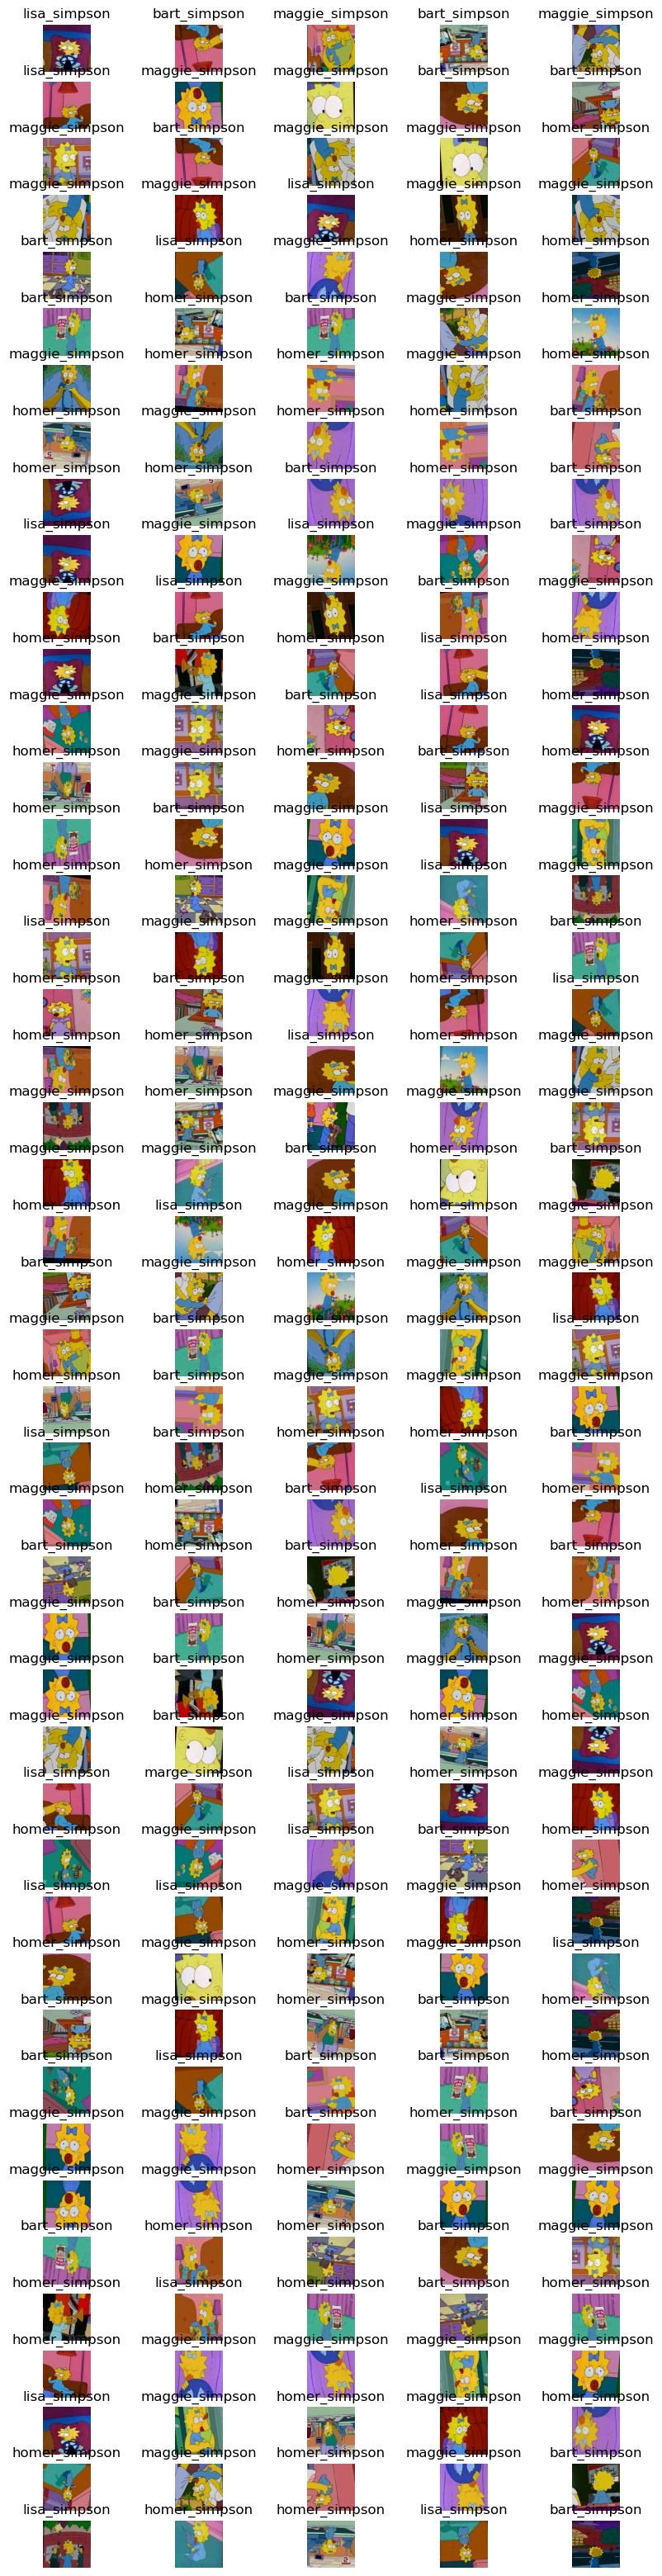

In [73]:
fig2 = plt.figure(figsize=(10,40))
for i in range(45):
    for j in range(5):
        img = load_img(img_path[i*5+j])
        plt.subplot(45,5,i*5+j+1)
        plt.title(class_names[y_predict_kmeans[i*5+j]])
        plt.imshow(img)
        plt.axis("off")

In [ ]:
#not so good

In [ ]:

# meanshift
聚类

In [113]:
from sklearn.cluster import MeanShift,estimate_bandwidth

bw = estimate_bandwidth(X,n_samples = 3000)
print(bw)


1775.973958280559


In [85]:

cnn_ms = MeanShift(bandwidth = bw)


In [1]:
# according to number of the image is massive
# not suitable for meanshit, takes forever
# lets take a look after PCA
cnn_ms.fit(X)

# PCA

In [106]:
from sklearn.preprocessing import StandardScaler
stds = StandardScaler()
X_norm = stds.fit_transform(X)
#PCA analusis
from sklearn.decomposition import PCA
pca = PCA(n_components=2500)
X_pca = pca.fit_transform(X_norm)
#Principal components after dimensionality reduction

In [107]:
#calculate the variance ratio of each components
var_ratio = pca.explained_variance_ratio_
print(np.sum(var_ratio))

0.803412368935805


In [96]:
print(X_pca.shape,X.shape)


(6936, 200) (6936, 25088)


In [114]:
from sklearn.cluster import MeanShift,estimate_bandwidth

bw = estimate_bandwidth(X_pca,n_samples = 3000)
print(bw)

178.99045086745323


In [115]:
cnn_pca_ms = MeanShift(bandwidth = bw)

In [2]:
# meanshift not suitable, takes to long
cnn_pca_ms.fit(X_pca)